# SPRINT 8

# Nivel 1
## ejercicio 1
### Una variable numérica.

Este código Python realiza análisis y visualización de datos para comprender la distribución de los montos máximos de transacción para un prefijo de tarjeta específica ("CcU-30%"). Aquí hay un desglose de los pasos involucrados:

BIBLIOTECAS:
- matplotlib.pyplot(plt): Se utiliza para crear y mostrar gráficos.
- pandas(pd): Se utiliza para la manipulación de datos y la creación de DataFrame.
- seaborn(sns): se utiliza para crear visualizaciones estadísticas basadas en Matplotlib.
- mysql.connector: Se utiliza para conectarse a una base de datos MySQL.

CONEXION:
Establecemos una conexión a una base de datos MySQL en localhost (127. 0. 0. 1) usando credenciales personales. de esta forma nos conectamos a la db_sprint4 base de datos.
Definir consulta SQL:

La consulta selecciona la amount columna de la tabla transactions.
Filtra los datos para incluir solo transacciones con ID de tarjeta que comienzan con "CcU-30%".
Agrupa los datos poramountpara contar el número de transacciones para cada monto único.
Ordena los datos poramounten orden descendente (de mayor a menor).
Limita los resultados a los 15 montos de transacciones más altos.

CONSULTA Y DATAFRAME:
Creamos un objeto de cursor para ejecutar la consulta SQL.
Usamos pd.read_sql_query para ejecutar la consulta y recuperar los resultados como un DataFrame de pandas llamado df.

GRAFICACIÓN:
Usamos sns.barplot para crear un gráfico de barras usando el dataframe (df).
Establecemos el eje x (x) y el eje y (y) variables para que ambas sean'amount'. Esto crea un gráfico de barras donde cada barra representa un monto de transacción único y su altura representa la cantidad de transacciones con ese monto.
Establecemos el color de la barra en'skyblue'.

PERSONALIZACION:
Establecemos el tamaño de la figura usando sns.set_theme con rc={'figure.figsize': (7, 5)}.
Giramos las etiquetas de marca del eje x a 75 grados para una mejor legibilidad usando plt.xticks(rotation=75).
Establecemos el tamaño de fuente de las etiquetas del eje x en 8 usando plt.xticks(fontsize=8).
Agregamos un título a la trama usando plt.title.
Etiquetamos el eje x y el eje y usando plt.xlabel y plt.ylabel.
Ajustamos el espacio entre elementos con plt.tight_layout.

CERRAR RECURSOS:
Cerramos el objeto cursor de la base de datos y la conexión para garantizar una gestión adecuada de los recursos.

VISUALIZACION:
Usamos plt.show para mostrar el gráfico de barras generado.

Este código recupera datos de una base de datos MySQL, analiza los montos de las transacciones para un prefijo de tarjeta específico y visualizamos la distribución de los montos de transacciones más altos mediante un gráfico de barras. La gráfica ayuda a comprender la frecuencia de diferentes montos de transacciones e identificar posibles valores atípicos o patrones.

C:\Users\SINERGIA\AppData\Local\Temp\ipykernel_2348\1024888682.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


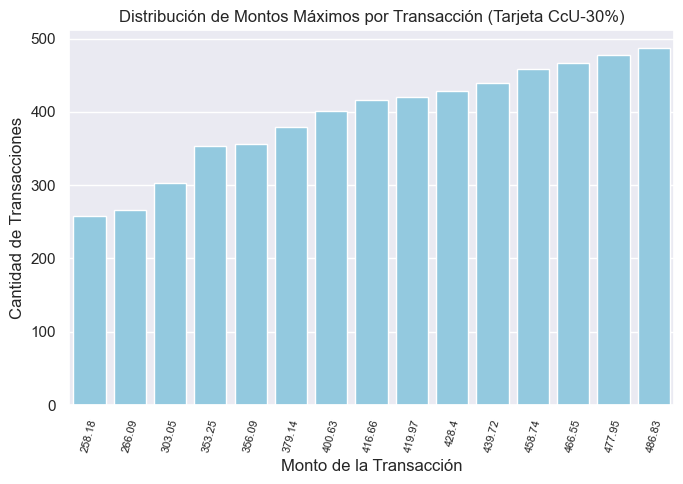

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mysql.connector
conn = mysql.connector.connect(host='127.0.0.1',
                                   port='3306',
                                   database='db_sprint4',
                                   user='root',
                                   password='***')

q = "SELECT amount  FROM transactions WHERE card_id like 'CcU-30%' GROUP BY amount ORDER BY amount DESC LIMIT 15"
cursor = conn.cursor()

df = pd.read_sql_query(q, conn)

sns.barplot(data=df, x='amount', y='amount', color='skyblue')

sns.set_theme(rc={'figure.figsize': (7, 5)})
plt.xticks(rotation=75, fontsize=8)
plt.title("Distribución de Montos Máximos por Transacción (Tarjeta CcU-30%)")
plt.xlabel("Monto de la Transacción")
plt.ylabel("Cantidad de Transacciones")
plt.tight_layout()

cursor.close()
conn.close()
plt.show()

## Ejercicio 2
### Dos variables numéricas.

Este código Python realiza las siguientes tareas:

BIBLIOTECAS:
- pandas: Se utiliza para la manipulación de datos y la creación de DataFrames.
- seaborn: Se utiliza para la visualización de datos.
- mysql.connector: Se utiliza para conectarse a una base de datos MySQL.

CONEXION:
Establecemos una conexión a una base de datos MySQL nombrada db_sprint4 en localhost con el nombre de usuario root y la contraseña personal.

RECUPERAR DATOS:
Definimos una consulta SQL que une las tablas companies y transactions en la business_id columna.
Seleccionamos las columnas company_id y amount de las tablas unidas.
Ordenamos los resultados en amount en orden descendente.
Ejecutamos la consulta utilizando un objeto de cursor.
Obtenemos todos los datos recuperados como una lista de tuplas.
Extrae los nombres de las columnas de la descripción del cursor.
Creamos asi un DataFrame de pandas para utilizarlo con los datos obtenidos y los nombres de las columnas previas.

VISUALIZACION:
Seaborn: este código incluye líneas comentadas para diferentes opciones de visualización. 
Creamos un diagrama de dispersión usando sns.scatterplot en company_id el eje x y amount en el eje y.
Establecemos el tamaño de la figura usando sns.set_theme para una mejor legibilidad.
Giramos las etiquetas de marca del eje x 75 grados y ajusta el tamaño de fuente para una mejor visualización.
Agrega un título, etiquetas para los ejes y muestra el gráfico usando plt.show().


LIMPIEZA DATOS:
El código incluye una línea comentada cursor.close() que cerraría el cursor de la base de datos después de su uso. Generalmente es una buena práctica cerrar el cursor para liberar recursos.
En general, este código recupera datos de una base de datos MySQL sobre los ID de las empresas y los montos de las transacciones, luego crea un diagrama de dispersión para explorar visualmente la distribución de los montos de las transacciones entre diferentes empresas.

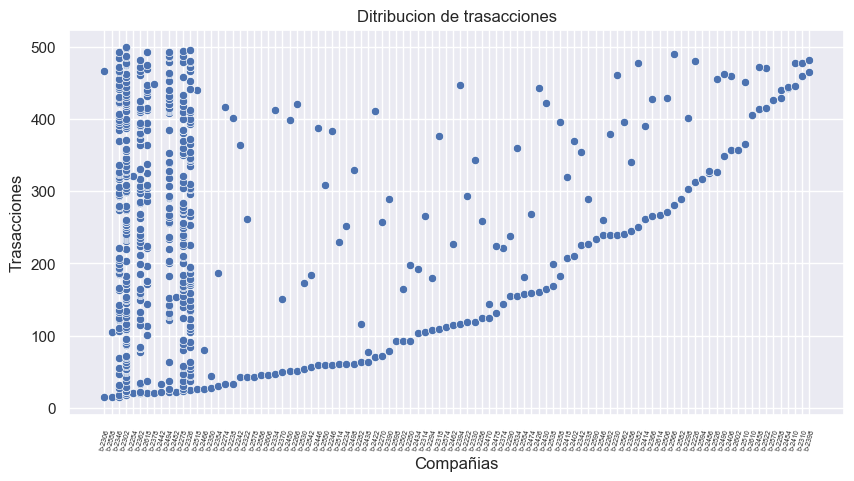

True

In [75]:
import pandas as pd 
import seaborn as sns 
import mysql.connector 
conn = mysql.connector.connect(host='127.0.0.1',
                                   port='3306',
                                   database= 'db_sprint4',
                                   user='root',
                                   password='***')
q = "SELECT company_id, amount FROM companies JOIN transactions ON business_id=company_id ORDER BY amount"
cursor = conn.cursor()
cursor.execute(q)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

sns.scatterplot(data=df, x='company_id', y='amount')

sns.set_theme(rc={'figure.figsize':(10, 5)})  
plt.xticks(rotation=75, fontsize=5)
plt.title("Ditribucion de trasacciones")
plt.xlabel("Compañias")
plt.ylabel("Trasacciones")
plt.show()

cursor.close()

## Ejercicio 3
### Una variable categórica.

BIBLIOTECAS:
- pandas: Se utiliza para la manipulación de datos y la creación de marcos de datos.
- matplotlib.pyplot: Se utiliza para funciones básicas de trazado.
- seaborn: Proporciona una interfaz de nivel superior para crear visualizaciones estadísticas sobre Matplotlib.
- numpy: No se usa directamente en este código, pero es una dependencia común para la informática científica y potencialmente utilizada por otras bibliotecas.
- mysql.connector: permite conectarse a una base de datos MySQL.

CONEXION:
Establecemos una conexión a la base de datos MySQL con el host, puerto, nombre de la base de datos, nombre de usuario y contraseña específicas.
Definimos una consulta SQL (q) que selecciona la columna country y cuenta las apariciones de cada país de la tabla companies, agrupando country y limitando los resultados a los 15 países principales.
Ejecutamos la consulta utilizando un cursor y recuperamos los resultados.
Extraemos los nombres de las columnas de la descripción del cursor.
Creamos un DataFrame de pandas (df) de los datos obtenidos con los nombres de las columnas extraídas.
para abastecer directamente al DataFrame a partir de la consulta y conexión de la base de datos.

VISUALIZACION:
Establecemos el tamaño de figura predeterminado para los gráficos de Seaborn usando sns.set_theme.
Giramos las etiquetas de marca del eje x 75 grados y establece su tamaño de fuente en 10 para una mejor legibilidad (especialmente en muchos países).
Creamos un gráfico de barras usando sns.barplot, visualizando el recuento de empresas de cada país.
Establecemos el título, etiqueta del eje x, y etiqueta del eje y para el gráfico.
Ajusta el espaciado dentro del gráfico usandoplt.tight_layout.
Por ultimo mostramos el gráfico usando plt.show.

CIERRE CONEXION:
Cerramo la conexión a la base de datos MySQL para evitar fugas de recursos.
En general, el código recupera datos de una base de datos MySQL de manera efectiva, los procesa en un DataFrame y crea un gráfico de barras utilizando Seaborn para visualizar la distribución de empresas en diferentes países.

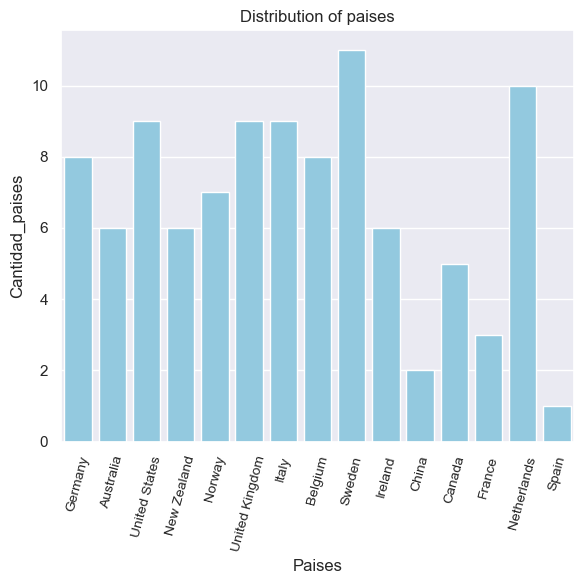

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mysql.connector 
conn = mysql.connector.connect(host='127.0.0.1',
                                   port='3306',
                                   database= 'db_sprint4',
                                   user='root',
                                   password='***')

q = "SELECT country, COUNT(country) FROM companies GROUP BY country LIMIT 15"
cursor = conn.cursor()
cursor.execute(q)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

sns.set_theme(rc={'figure.figsize':(6, 6)})  
plt.xticks(rotation=75, fontsize=10)
sns.barplot(data=df, x='country', y='COUNT(country)', color='skyblue')
plt.title("Distribution of paises")
plt.xlabel("Paises")
plt.ylabel("Cantidad_paises")

plt.tight_layout()
plt.show()
conn.close()

# - Ejercicio 4
### Una variable categórica y una numérica.

Este código Python realiza los siguientes pasos:

BIBLIOTECAS:
Importamos bibliotecas necesarias para la manipulación de datos ( pandas), visualización ( seaborny matplotlib.pyplot) y conexión a bases de datos ( mysql.connector).

CONEXION:
Nos enlazamos a la base de datos por medio de una conexión a MySQL denominada que db_sprint4se ejecuta en localhost (127. 0. 0. 1) con credenciales root personales.
Ejecutamos la consulta SQL donde definimos (q) que selecciona el country y cuenta los números de teléfono (phone) para cada país de la tabla companies. Los resultados se limitan a los 15 principales países que utilizan LIMIT 15.

OBTENCION DATOS:
Creamos un objeto de cursor para ejecutar la consulta y recupera los resultados usando fetchall(). Además, extrae los nombres de las columnas de la descripción del cursor y crea un DataFrame de pandas (df) de los datos obtenidos.
Creamos gráfico de barras usando seaborn.barplot para crear un gráfico de barras que visualice el recuento de números de teléfono (COUNT(phone)) en el eje y y los países (country) en el eje x.

PERSONALIZACION:
sns.set_theme establece el tamaño de la figura a un tamaño más manejable (7 pulgadas de ancho,4 pulgadas de alto).
plt.xticks(rotation=75, fontsize=12) rota las etiquetas de marca del eje x para una mejor legibilidad y establecemos su tamaño de fuente en 12.
Los títulos y etiquetas se agregan usando plt.title, plt.xlabel, y plt.ylabel.

CERRAMOS CONEXION:
Finalmente, el cursor y la conexión de la base de datos se cierran para liberar recursos.

En general, este código recupera datos sobre la cantidad de números de teléfono asociados con cada país de una tabla de base de datos MySQL y los visualiza mediante un gráfico de barras.

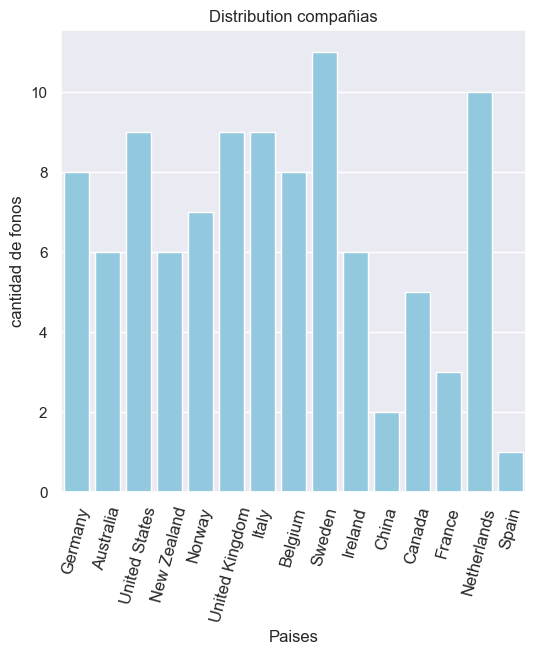

In [7]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import mysql.connector 
conn = mysql.connector.connect(host='127.0.0.1',
                                   port='3306',
                                   database= 'db_sprint4',
                                   user='root',
                                   password='***')

q = "SELECT country, COUNT(phone) FROM companies GROUP BY country LIMIT 15"
cursor = conn.cursor()
cursor.execute(q)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

sns.barplot(data=df, x='country', y='COUNT(phone)', color='skyblue')
sns.set_theme(rc={'figure.figsize':(7, 4)})  
plt.xticks(rotation=75, fontsize=12)
plt.title("Distribution compañias")
plt.xlabel("Paises")
plt.ylabel("cantidad de fonos")
plt.show()

cursor.close()
conn.close()

# - Ejercicio 4
### Una variable categórica y una numérica.

Este código Python realiza los siguientes pasos:

BIBLIOTECAS:
Importamos las bibliotecas necesarias:
- pandas para manipulación de datos
- seaborn y matplotlib para visualización de datos.
- numpy (potencialmente no utilizado en este fragmento de código específico)
- mysql. Conector para interacción con bases de datos.

CONEXION:
Establecemos una conexión a una base de datos MySQL nombrada db_sprint4 en la máquina local ( localhost), con acceso y privilegios personales

RECUPERACION DE DATOS:
Definimos una consulta SQL (q) para seleccionar las columnas colour, price, ordenadas por precio en orden descendente y limitada a las 35 filas superiores.
Ejecutamos la consulta utilizando un objeto de cursor. Recuperamos todas las filas recuperadas (data) y recupera los nombres de las columnas (columns) de la descripción del cursor.
Creamos un DataFrame de pandas (df) para depositar los datos obtenidos con los nombres de columna correspondientes.

VISUALIZACION:
El código incluye líneas comentadas para posibles visualizaciones:
Usamos sns.scatterplot(data=df, x='colour', y='price') para crear un diagrama de dispersión, visualizando el precio de cada producto en función de su color.

PERSONALIZACION:
Establecemos el tamaño de la figura para el gráfico usando sns.set_theme.
Giramos las etiquetas de marca del eje x 75 grados y ajusta su tamaño de fuente usando plt.xticks.
Estableciendo el título "Precios de productos", etiqueta del eje x ("color"), y etiqueta del eje y ("precio").
Muestra el gráfico generado usando plt.show().

LIMPIEZA BASE DE DATOS:
Cerramos el cursor y los objetos de conexión de la base de datos para liberar recursos.
En general, el código recupera datos de precios y colores del producto de una base de datos, crea un diagrama de dispersión para visualizar la distribución de precios entre colores y luego personaliza el diagrama para su presentación.

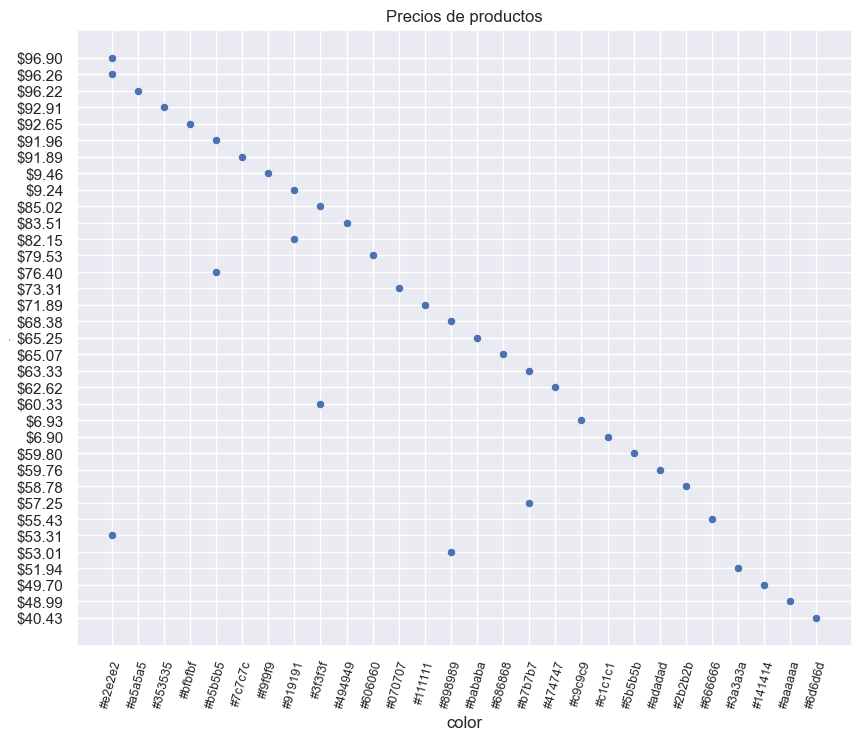

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
conn = mysql.connector.connect(host='127.0.0.1',
                                   port='3306',
                                   database= 'db_sprint4',
                                   user='root',
                                   password='***')

q = "SELECT colour, price FROM products order by price desc LIMIT 35"
cursor = conn.cursor()
cursor.execute(q)
data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

#sns.displot(data=df, x='colour', y='price')
#sns.relplot(data=df, x='colour', y='price')
sns.scatterplot(data=df, x='colour', y='price')

sns.set_theme(rc={'figure.figsize':(10, 8)}) 
plt.xticks(rotation=75, fontsize=9)
plt.title("Precios de productos")
plt.xlabel("color")
plt.ylabel("price", fontsize=1)
plt.show()

cursor.close()
conn.close()

# - Ejercicio 5
### Dos variables categóricas.

Este código Python realiza los siguientes pasos:

BIBLIOTECAS:
- pandas: para manipulación de datos y creación de DataFrame
- seaborn(sns): para crear visualizaciones
- matplotlib.pyplot(plt): para funcionalidades de trazado de bajo nivel (utilizado por seaborn)
- mysql.connector: para conectarse a una base de datos MySQL

CONEXION Y EJECUCION:
Establecemos conexión de base de datos MySQL nombrada db_sprint4en la máquina local ( host='127.0.0.1') utilizando las credenciales personales especificas.
Ejecutamos consulta de base de datos donde se define un query (q) que recupera el country y un recuento de nombres de empresas (COUNT(company_name)) desde la tabla companies,agrupados por el country campo y limitado a los 15 primeros resultados.

OBTENCION Y PROCESO:
Creamos un objeto de cursor para ejecutar la consulta, la consulta se ejecuta usando cursor.execute(q).
Todos los resultados se obtienen a la vez usandocursor.fetchall().
Los nombres de las columnas se extraen de la descripción del cursor mediante una lista por comprensión. El (df) se crea a partir de los datos obtenidos con los nombres de las columnas extraídas.

VISUALIZACION:
Con sns.barplot, función que se utiliza para crear un gráfico de barras.
Usamos el dataframe (df) para pasar como datos. El eje x representa el country y el eje y representa el COUNT(company_name). Esto visualiza el número de empresas de cada país (limitado a las 15 principales).
Aplicamos personalizaciones adicionales usando sns.set_theme para el tamaño de la figura y funciones plt para la rotación del eje x, tamaño de fuente y etiquetas.

CERRAR CONEXION:
El cursor de la base de datos y la conexión se cierran explícitamente para liberar recursos.
Se imprime un mensaje de éxito confirmando la conexión cerrada.

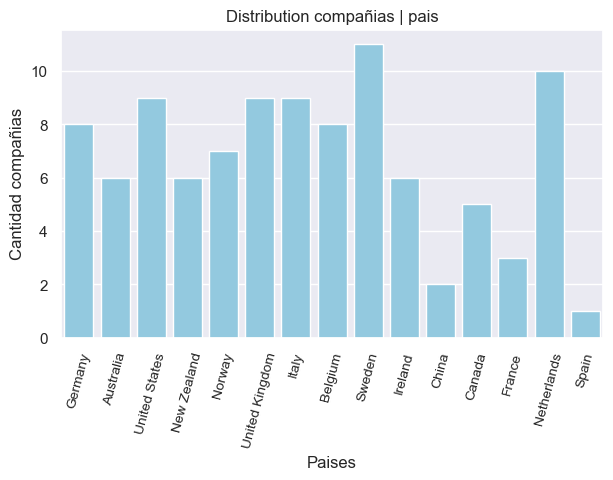

MySQL: conexión cerrada.


In [8]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import mysql.connector
conn = mysql.connector.connect(host='127.0.0.1',
                                   port='3306',
                                   database= 'db_sprint4',
                                   user='root',
                                   password='***')

q = "SELECT country, COUNT(company_name) FROM companies GROUP BY country LIMIT 15"
cursor = conn.cursor()
cursor.execute(q)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

sns.barplot(data=df, x='country', y='COUNT(company_name)', color='skyblue') #......Tipo de gráfico

sns.set_theme(rc={'figure.figsize':(9,6)}) 
plt.xticks(rotation=75, fontsize=10) #......Detalles de gráfico
plt.title("Distribution compañias | pais")
plt.xlabel("Paises")
plt.ylabel("Cantidad compañias")
plt.show()

cursor.close()
conn.close()
print("MySQL: conexión cerrada.")

# - Ejercicio 6
### Tres variables.

BIBLIOTECAS:
- mysql.connector: Esta biblioteca permite que el código se conecte a una base de datos MySQL.
- pandas: Esta biblioteca proporciona herramientas para la manipulación y análisis de datos en forma de DataFrames.
- seaborny matplotlib.pyplot: estas bibliotecas se utilizan para crear visualizaciones (gráficos) con los datos.
- numpy: Esta biblioteca ofrece varias funciones matemáticas que pueden usarse en el análisis de datos

CONEXION:
Conectamos a una base de datos MySQL nombrada db_sprint4 en la máquina local ( localhost) utilizando las credenciales personales.
Lanzamos una consulta SQL ( q) se sirve seleccionar tres columnas (colour, price, weight) de la tabla, ordenadas en orden ascendente.
El script ejecuta la consulta usando un cursor y recupera todos los resultados ( fetchall()).
Los nombres de las columnas se extraen de la descripción del cursor y se utilizan para crear un DataFrame de pandas (df) a partir de los datos recuperados.

VISUALIZACION:
sns.scatterplot: Esta función de Seaborn crea un diagrama de dispersión para visualizar la relación entre el precio (x-axis) y color (y-axis).
hue: El hue parámetro que especifica que los puntos de datos deben colorearse según el peso (weight).
palette='pastel': Establecemos la paleta de colores para los puntos de datos en un esquema de colores pastel.
plt.xticks: Ajustamos las etiquetas de marca del eje x (precio). Los gira 75 grados y establece el tamaño de fuente en 10.
plt.title: Establecemos un título para el gráfico ("Color de distribución/precios/").
plt.xlabelyplt.ylabel: Establecemos etiquetas para el eje x ("precio") y el eje y ("color").
plt.show: Mostramos el diagrama de dispersión generado.

CERRAR CONEXION:
Finalmente, el cursor y la conexión de la base de datos se cierran para liberar recursos.
En general, este código recupera datos de una tabla de base de datos MySQL, crea un DataFrame y luego usa Seaborn para crear un diagrama de dispersión que visualiza la relación entre el precio y el color, donde los puntos de datos se colorean según el peso.

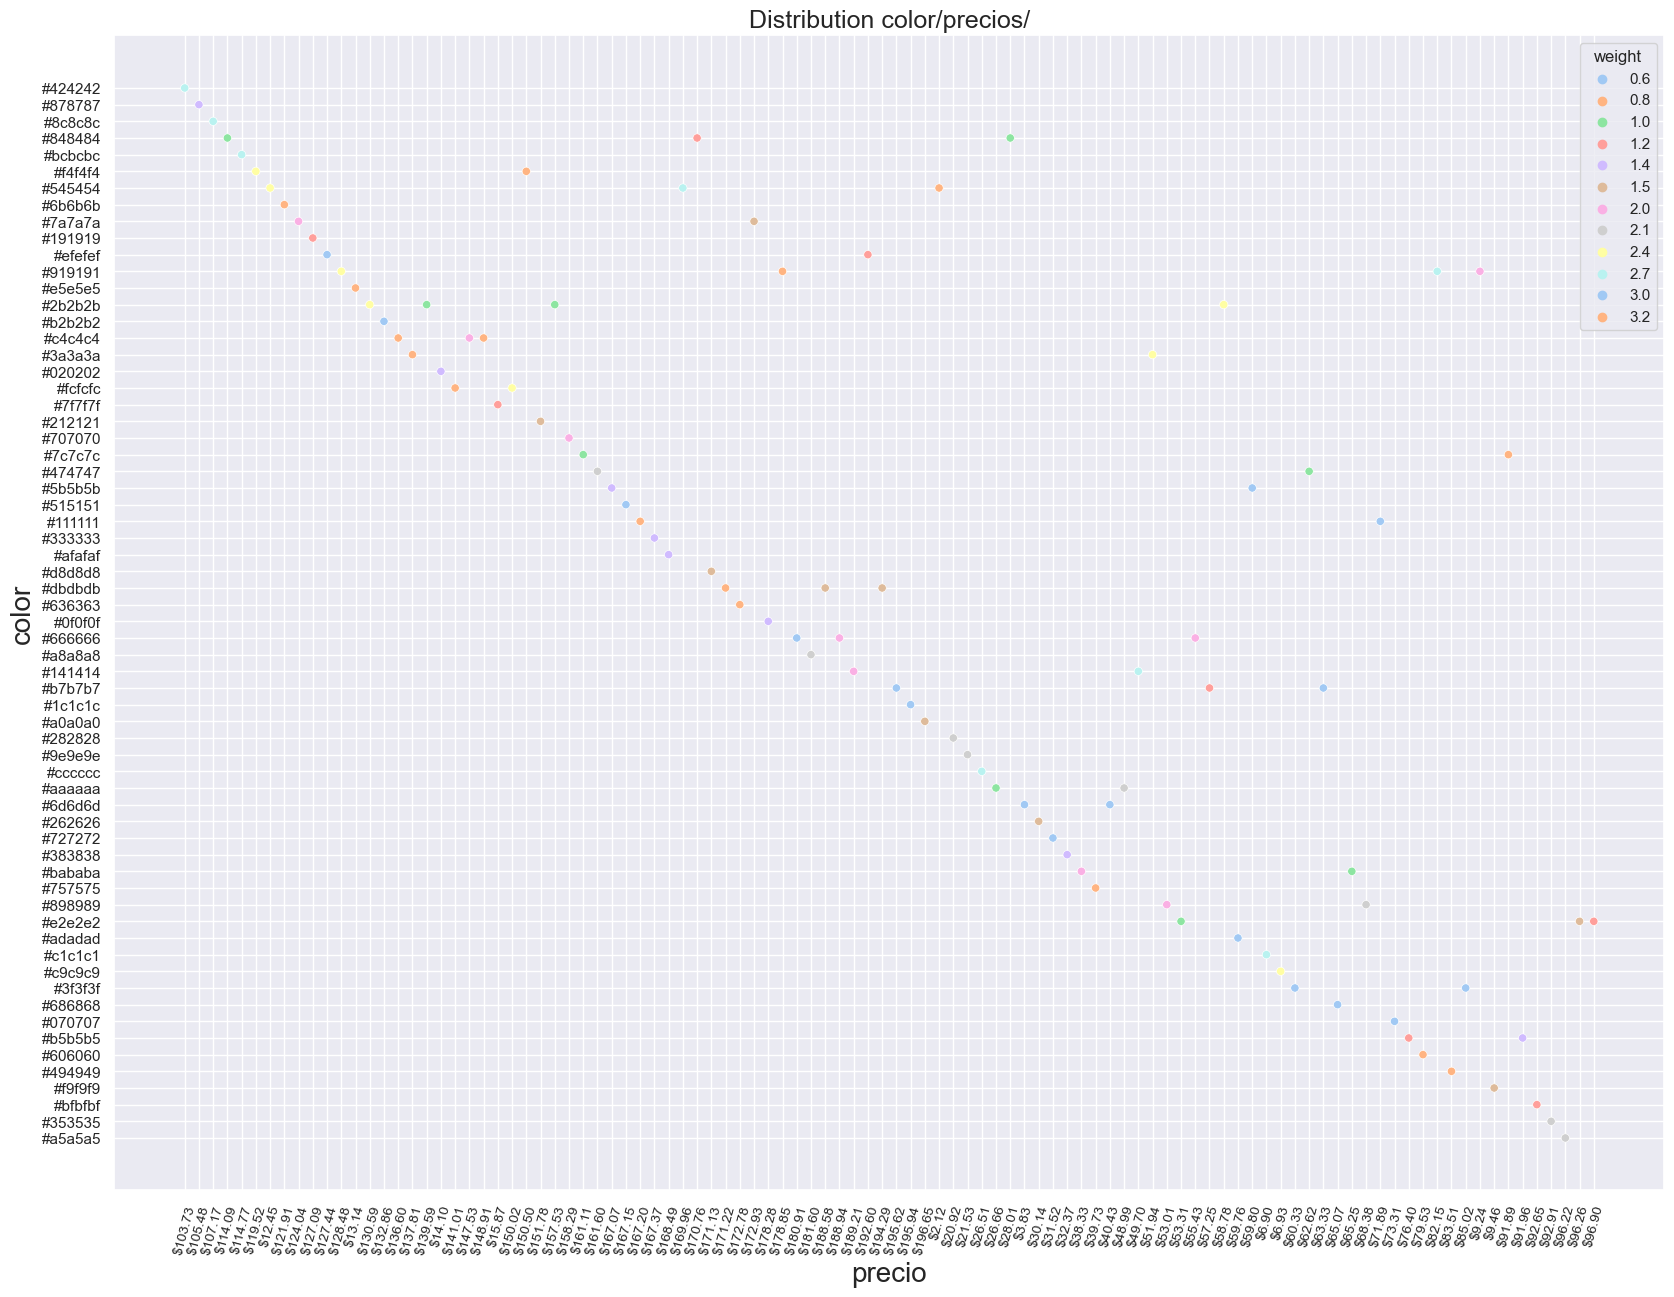

In [16]:
import mysql.connector #Para realizar la conexion con MySQL
import pandas as pd #Pandas para tratar los datos
import seaborn as sns #Seaborn y Matplotlib para realizar plots con los datos
import matplotlib.pyplot as plt
import numpy as np

import mysql.connector
conn = mysql.connector.connect(host='127.0.0.1',
                                   port='3306',
                                   database= 'db_sprint4',
                                   user='root',
                                   password='***')

q = "SELECT colour, price, weight FROM products ORDER BY price ASC"
cursor = conn.cursor()
cursor.execute(q)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

sns.scatterplot(data=df, x='price', y='colour', hue='weight', palette='pastel')
sns.set_theme(rc={'figure.figsize':(20, 15)})
plt.xticks(rotation=75, fontsize=10)
plt.title("Distribution color/precios/", size=18)
plt.xlabel("precio", size=20)
plt.ylabel("color", size=20)
plt.show()

cursor.close()
conn.close()

# - Ejercicio 7
### Graficar un Pairplot.

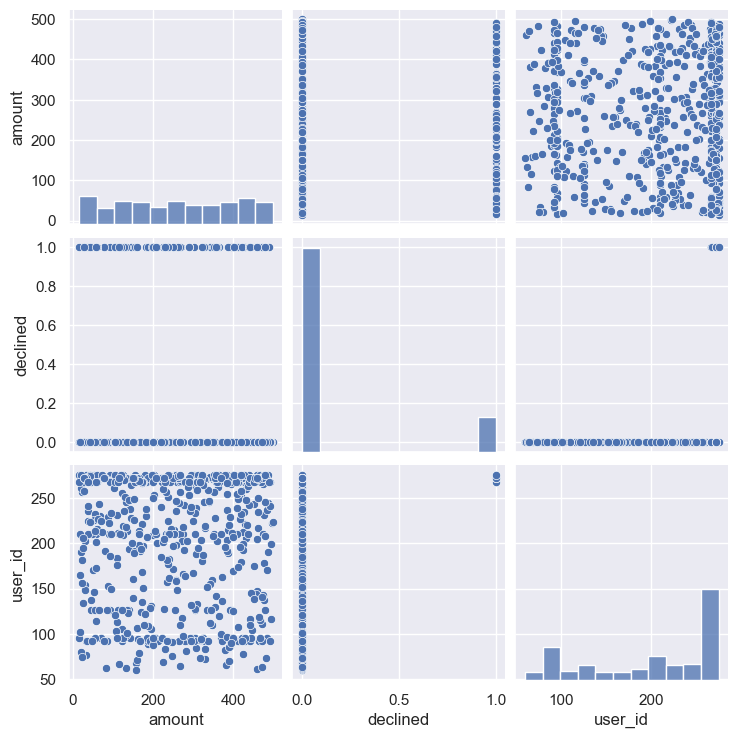

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
conn = mysql.connector.connect(host='127.0.0.1',
                                   port='3306',
                                   database= 'db_sprint4',
                                   user='root',
                                   password='***')

q = "SELECT product_ids, amount, declined, user_id  FROM transactions"
cursor = conn.cursor()
cursor.execute(q)
data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

sns.set_theme(rc={'figure.figsize':(20, 30)})
#plt.xticks(rotation=75, fontsize=10)  # se omite en este gráfico
sns.pairplot(data=df)
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.show()

cursor.close()
conn.close()

A pesar del grafico arriba desarrollado, intentamos cambiar la base de datos para ampliar la visualizacion
En este código Python realiza los siguientes pasos:

BIBLIOTECAS:
- pandas: Se utiliza para la manipulación de datos y la creación de marcos de datos.
- seaborn: Proporciona visualizaciones estadísticas avanzadas.
- matplotlib.pyplot: Ofrece funcionalidades básicas de trazado.
- numpy: Se utiliza para operaciones numéricas (no se utiliza directamente en este código específico).
- mysql.connector: Permite la conexión a una base de datos MySQL.

CONEXION:
Establecemos una conexión a una base de datos MySQL nombrada db_sprint8 en la máquina local con credenciales personales.

CONSULTA:
Definimos una consulta q para seleccionar cuatro columnas (petal_length, petal_width, sepal_length, sepal_width) desde la tabla iris.
Creamos un objeto de cursor para interactuar con la base de datos, con ellos ejecutamos la consulta usando cursor.execute(q).

FORMATO DE DATOS:
Recuperamos todos los resultados de la consulta usando cursor.fetchall().
Extraemos nombres de columnas de la descripción del cursor de la base de datos mediante comprensión de listas.
Creamos un marco de datos de Pandas df de los datos obtenidos y los nombres de las columnas extraídas.

DIAGRAMA DE PARES:
Establecemos un tamaño de figura grande usando sns.set_theme para mejorar la claridad de visualización.
Generamos un gráfico de pares usando sns.pairplot(data=df). Un diagrama de pares crea una matriz de diagrama de dispersión, donde cada subtrama muestra la relación entre dos variables del DataFrame.
Definimos el título y etiquetas del eje x,y etiquetas del eje y usandoplt.title(""), plt.xlabel(""), yplt.ylabel(""). Asi evitamos texto innecesario ya que los nombres de las variables estan codificados con los nombres de las columnas del DataFrame.

CERRAR CONEXION:
Cerramos el cursor de la base de datos y la conexión para liberar recursos.
En general, este código recupera datos de un conjunto de datos de flores de la tabla Iris almacenado en una base de datos MySQL, los convierte en un DataFrame de pandas y luego crea un diagrama de pares para visualizar las relaciones entre todos los pares de características en el conjunto de datos.

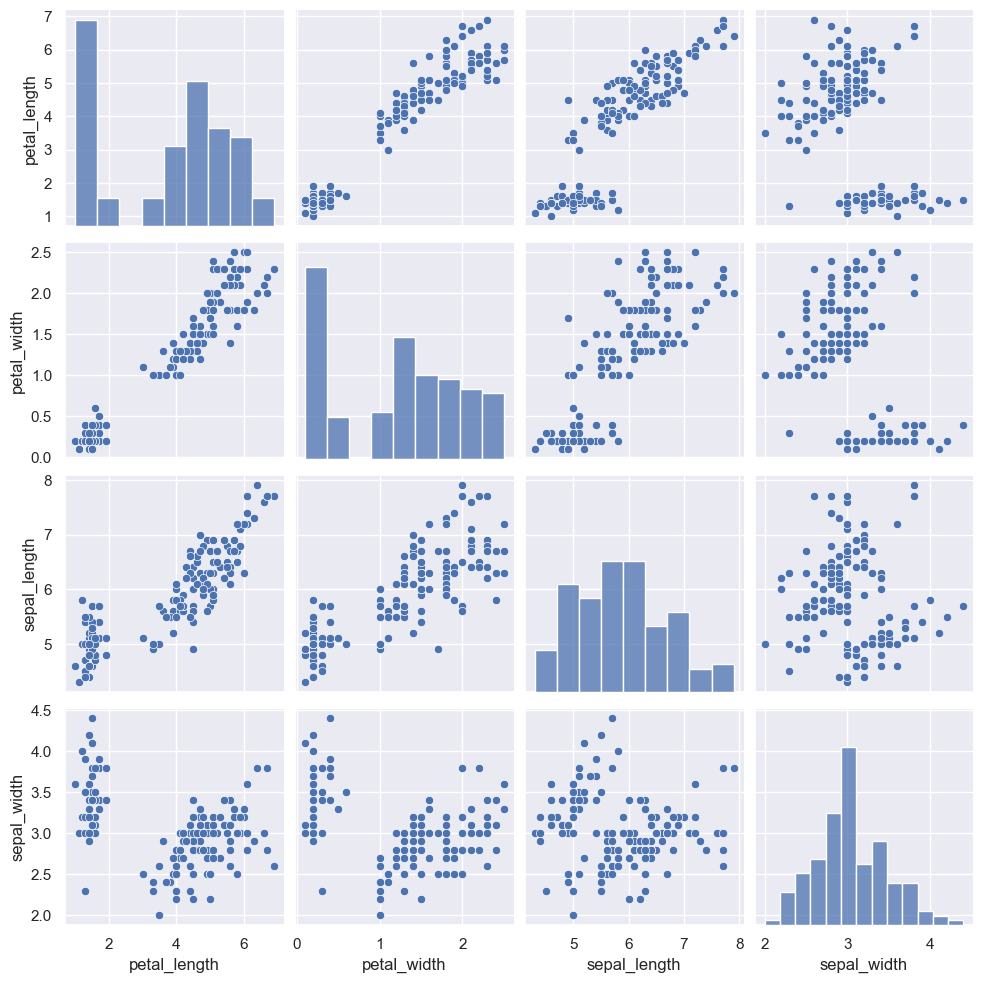

In [13]:
# en vista que se logró pocos resultados en el ejercicio anterior, usamos otra base de datos para
# poder ejercitar las capacidades de PAIRPLOT
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
conn = mysql.connector.connect(host='127.0.0.1',
                                   port='3306',
                                   database= 'db_sprint8',
                                   user='root',
                                   password='***')

q = "SELECT petal_length, petal_width, sepal_length, sepal_width FROM iris"
cursor = conn.cursor()
cursor.execute(q)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

sns.set_theme(rc={'figure.figsize':(30, 30)})
sns.pairplot(data=df)
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.show()

cursor.close()
conn.close()

# NIVEL 2
## EJERCICIO 1
### Correlación de todas las variables numéricas.

Este código realiza los siguientes pasos:

BIBLIOTECAS:
- pandas: Manipulación de datos y creación de DataFrame.
- seaborn: Biblioteca de visualización para crear mapas de calor.
- matplotlib.pyplot: Biblioteca de trazado base utilizada por seaborn.
- numpy: Se utiliza para posibles operaciones numéricas (no se utiliza en este fragmento de código específico).
- mysql.connector: Se conecta a una base de datos MySQL.

CONEXION:
Establecemos una conexión a una base de datos MySQL nombrada db_sprint8 usando credenciales personales
Definimos una consulta (q) para seleccionar cuatro columnas (petal_length, petal_width, sepal_length, sepal_width)
de la tabla iris.
Ejecutamos la consulta utilizando un objeto de cursor.
Obtenemos todos los resultados en una lista (data).
Extraemos los nombres de las columnas de la descripción del cursor y crea un DataFrame (df) usando pandas.
Como buena practica cerramos la conexión de la base de datos.

MATRICES DE CORRELACION:
Calculamos la matriz de correlación para el DataFrame (df.corr()) que contiene los coeficientes de correlación
entre todos los pares de columnas numéricas.
Imprimimos la matriz de correlación en la consola.

MAPAS DE CALOR:
Utilizamos seaborn para crear una visualización de mapa de calor de la matriz de correlación.
El annot=True como argumento permite mostrar los valores de correlación dentro de los cuadrados del mapa de calor.

FUNCIONALIDAD GENERAL:
Este código recupera datos de una tabla de base de datos MySQL llamada iris, calcula la matriz de correlación 
entre las columnas numéricas y luego crea un mapa de calor para representar visualmente las correlaciones.
El mapa de calor proporciona información sobre las relaciones (positivas, negativas o ninguna) entre las 
diferentes medidas de pétalos y sépalos de flores.

Correlation Matrix:
              petal_length  petal_width  sepal_length  sepal_width
petal_length      1.000000     0.962757      0.871754    -0.420516
petal_width       0.962757     1.000000      0.817954    -0.356544
sepal_length      0.871754     0.817954      1.000000    -0.109369
sepal_width      -0.420516    -0.356544     -0.109369     1.000000



<Axes: >

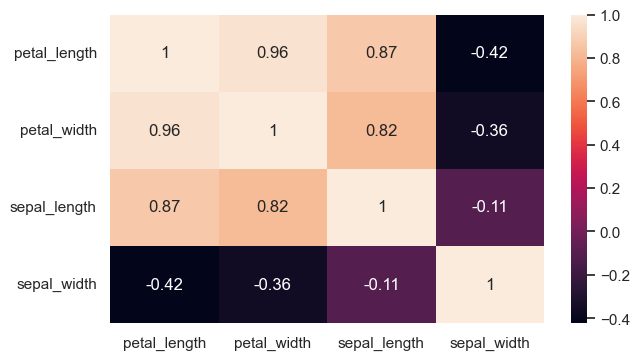

In [17]:
# Hacenmosn uso de otra base de datos para fines de graficación
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
conn = mysql.connector.connect(host='127.0.0.1',
                                   port='3306',
                                   database= 'db_sprint8',
                                   user='root',
                                   password='***')

q = "SELECT petal_length, petal_width, sepal_length, sepal_width FROM iris"
cursor = conn.cursor()
cursor.execute(q)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

conn.close()

correlation_matrix = df.corr() 

print("Correlation Matrix:")
print(correlation_matrix)
print()

sns.heatmap(df.corr(), annot=True)


Este código Python realiza análisis de regresión lineal y visualización de las dimensiones de los pétalos (largo y ancho) del conjunto de datos de flores Iris, desglose del código:

BIBLIOTECAS:
- pandas: Se utiliza para la manipulación de datos y la creación de marcos de datos.
- seaborn: Proporciona funciones para crear visualizaciones estadísticas.
- matplotlib.pyplot: Se utiliza para trazar funcionalidades.
- numpy: Proporciona operaciones y utilidades matemáticas.
- mysql.connector: Permite la conexión a una base de datos MySQL.
- scipy.stats.linregress: Función para análisis de regresión lineal.

CONEXION y CARGA DE DATOS:
Conectamos a nuestra base de datos MySQL local llamada 'db_sprint8' usando credenciales personales.
Ejecutamos una consulta para recuperar la longitud del pétalo, el ancho del pétalo, la longitud del sépalo y el ancho del sépalo de la tabla 'iris'.
Obtenemos los datos y creamos nombres de columnas a partir de la descripción de la consulta.
Creamos un DataFrame de pandas nombrado df, usando los datos obtenidos.
Cerramos la conexión de la base de datos.

REGRESION LINEAL:
Extraemos la longitud del pétalo (valores x) y el ancho del pétalo (valores y) del DataFrame.
Usamos linregress de scipy para realizar una regresión lineal sobre los datos obtenidos.
Esta función calcula y devuelve lo siguiente:
- Pendiente: El coeficiente de la ecuación lineal (describe la pendiente de la línea).
- Interceptar: La intersección del eje y de la línea de regresión.
- R-cuadrado: El coeficiente de determinación (mide la bondad de ajuste).
- Valor p: La significancia estadística de la relación (los valores p más bajos indican una correlación más fuerte).
- Error estándar: El error estándar de la estimación de la pendiente.
- Imprime los valores calculados.

VISUALIZACION:
Creamos un diagrama de dispersión usando seaborn para visualizar la relación entre la longitud y el ancho de los pétalos.
Utilizamos la pendiente y la intersección obtenidas de la regresión para generar una ecuación lineal de mejor ajuste (slope*x_value_lr+intercept).
Trazamos esta línea de mejor ajuste encima del diagrama de dispersión usando un color rojo y etiquetada como "Regresión lineal".
Agregamos etiquetas y títulos al gráfico para mayor claridad, mostramos de esta forma la visualización combinada.
En general, este código analiza eficazmente la relación lineal entre la longitud y el ancho de los pétalos en el conjunto de datos de Iris. Realiza regresión lineal, calcula estadísticas relevantes y creamos un diagrama de dispersión con la línea de regresión para representar visualmente los hallazgos.

Slope: 0.41641913228540123
Intercept: -0.3665140452167277
R-squared: 0.9269012279220042
P-value: 5.776660988491603e-86
Standard error: 0.009612539319328553


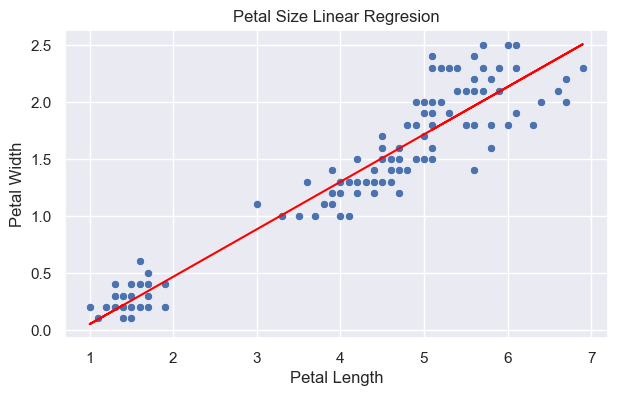

In [20]:
# Para un desarrollo claro en cuanto a la demostracion visual del grafico, usamos un dataset diferente
# con el afán de praticar otras posibilidades.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
from scipy.stats import linregress #Importaremos lineregress de scipy que viene con numpy.
conn = mysql.connector.connect(host='127.0.0.1',
                                   port='3306',
                                   database= 'db_sprint8',
                                   user='root',
                                   password='***')

q = "SELECT petal_length, petal_width, sepal_length, sepal_width FROM iris"
cursor = conn.cursor()
cursor.execute(q)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

conn.close()

x_value_lr = df['petal_length']
y_value_lr = df['petal_width']

slope, intercept, r_value, p_value, std_err = linregress(x_value_lr, y_value_lr) 

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard error:", std_err)

sns.scatterplot(data=df, x='petal_length', y='petal_width')
plt.plot(x_value_lr, slope*x_value_lr+intercept, color='red', label='Linear Regression') 
plt.title("Petal Size Linear Regresion")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

# EJERCICIO 2
### Implementa un jointplot.

Efectuamos las importaciones de modulos de Python.

- mysql.connector: Se conecta a una base de datos MySQL.
- pandas: Se utiliza para la manipulación de datos y la creación de DataFrames.
- seaborny matplotlib.pyplot: crear visualizaciones utilizando la interfaz de Seaborn sobre Matplotlib.
- numpy(potencialmente no utilizado en este código): proporciona operaciones numéricas (podría importarse para funciones futuras).
- Conexión de base de datos y recuperación de datos:

Establecemos una conexión a una base de datos MySQL nombrada db_sprint8 usando credenciales personales.
Ejecutamos una consulta para recuperar datos de la tabla iris, seleccionando columnas para el ancho del sépalo, la longitud del pétalo y la especie.
Obtenemos todos los resultados y creamos un DataFrame (df) usando pandas.

Visualización:
Establecemos el tamaño de la figura para el gráfico usando 'sns.set_theme'.
Se crea una trama conjunta con Seaborn (sns.jointplot),visualizando la relación entre el ancho del sépalo y el largo de los pétalos, mientras definimos por color las especies (paleta colores pastel).
Agregamos título y etiquetas para los ejes x e y.

Cerramos cursor de la base de datos y la conexión.

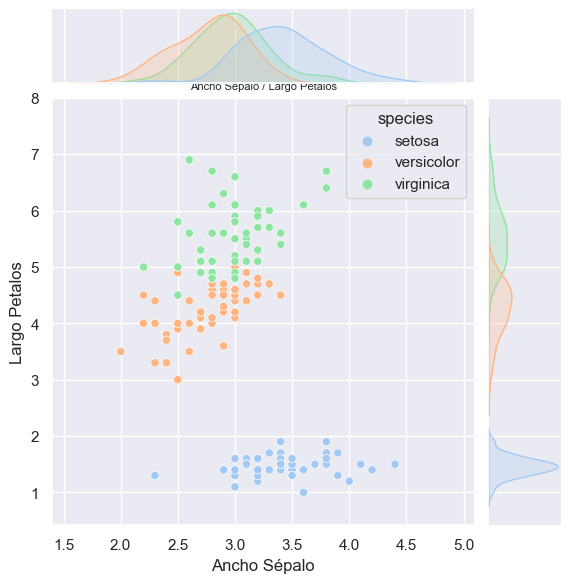

In [5]:
import mysql.connector #Para realizar la conexion con MySQL
import pandas as pd #Pandas para tratar los datos
import seaborn as sns #Seaborn y Matplotlib para realizar plots con los datos
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
conn = mysql.connector.connect(host='127.0.0.1',
                                   port='3306',
                                   database= 'db_sprint8',
                                   user='root',
                                   password='***')

query = "SELECT sepal_width, petal_length, species FROM iris"
cursor = conn.cursor()
cursor.execute(query)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

sns.set_theme(rc={'figure.figsize':(20, 10)})
sns.jointplot(data=df, x='sepal_width', y='petal_length', hue='species', palette='pastel')
plt.title("Ancho Sépalo / Largo Petalos", fontsize=8)
plt.xlabel("Ancho Sépalo")
plt.ylabel("Largo Petalos")
plt.show()

cursor.close()
conn.close()

# NIVEL 3
## EJERCICIO 1

### Implementa un violinplot combinado con otro tipo de gráfico.

Este código Python crea una visualización para explorar la relación entre las especies de flores y la longitud de los sépalos en el conjunto de datos de Iris:

BIBLIOTECAS:
- PANDAS: Se utiliza para la manipulación de datos y la creación de marcos de datos.
- SEABORN: Proporciona funciones para crear visualizaciones estadísticas (diagrama de violín, diagrama de caja).
- MATPLOTLIB.PYPLOT: Se utiliza para funciones básicas de trazado.
- MYSQL.CONNECTOR: Permite la conexión a una base de datos MySQL.

CARGA DE DATOS:
Establece una conexión a una base de datos MySQL nombrada db_sprint8en localhost (127. 0. 0. 1) usando credenciales (reemplácelas con sus credenciales reales si es necesario).
Ejecuta la consulta SELECT * FROM irispara recuperar todos los datos de la iristabla.
Convierte los datos recuperados en un DataFrame de pandas ( df).
Cierra la conexión de la base de datos.

VISUALIZACION:
Creamos un diagrama de violín seaborn.violinplot para visualizar la distribución de la longitud de los sépalos en diferentes especies de flores.
showmeans=True muestra los valores medios dentro del gráfico del violín. Crea un diagrama de caja usando seaborn.boxplot para mostrar la distribución con cuartiles y posibles valores atípicos, nuevamente con especies en el eje x y longitud de sépalo en el eje y.

PERSONALIZACION:
Establecemos el tamaño de la figura para el gráfico usando sns.set_theme.
Con esta opcion tenemos las posibilidad de girar las etiquetas a conveniencia del eje x (species), 
para mejor legibilidad, aunque este no fue el caso.
Establecemos el tamaño de fuente para las etiquetas de marca del eje x.
Agregamos un título,etiqueta del eje x,y etiqueta del eje y para mayor claridad.
Muestra la visualización generada usando plt.show().

C:\Users\SINERGIA\AppData\Local\Temp\ipykernel_20152\299455679.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(q, conn)


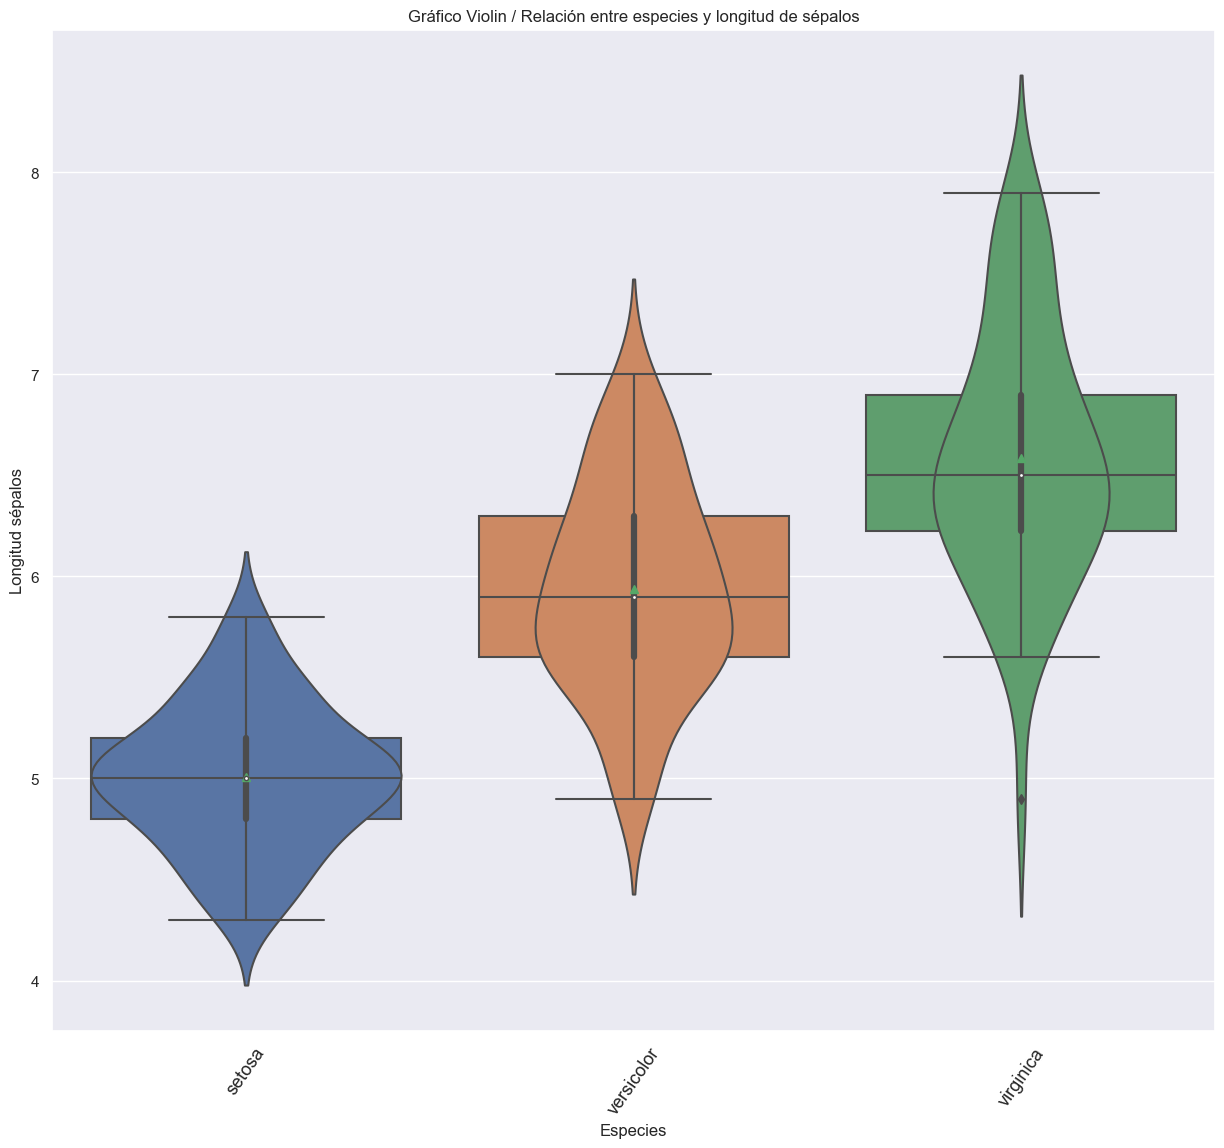

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
conn = mysql.connector.connect(host='127.0.0.1',
                                   port='3306',
                                   database= 'db_sprint8',
                                   user='root',
                                   password='***')

q = "SELECT * FROM iris"
df = pd.read_sql_query(q, conn)
conn.close()

sns.violinplot(data=df, x="species", y="sepal_length", showmeans=True)
sns.boxplot(data=df, x="species", y="sepal_length", showmeans=True)


sns.set_theme(rc={'figure.figsize':(15, 13)})
plt.xticks(rotation=0, fontsize=13)
plt.title("Gráfico Violin / Relación entre especies y longitud de sépalos")
plt.xlabel("Especies")
plt.ylabel("Longitud sépalos")
plt.show()

# Ejercicio 2
### Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.

Este código Python crea una visualización FacetGrid utilizando seaborn para explorar las relaciones entre la supervivencia de los pasajeros, la clase (Pclass), el sexo y la edad en un conjunto de datos del Titanic.

IMPORTACIONES:
El código comienza importando las bibliotecas necesarias:
- pandas para manipulación de datos, seaborn para visualización, matplotlib. pyplot para trazar y mysql. Conector para interacción con bases de datos.
- Conexión de base de datos: se conecta a una base de datos MySQL nombrada db_sprint8mediante credenciales y recupera todos los datos de la titanictabla.
- Procesamiento de datos: los datos recuperados se almacenan en un DataFrame de pandas llamado df.
- Configuración de visualización: establece el tamaño de la figura y define una paleta de colores PERSONALIZACION.
- Creamos de FacetGrid: el código se utiliza sns.FacetGridpara crear una cuadrícula de subtramas basadas en dos variables categóricas: (clase de pasajero) para columnas y (estado de supervivencia) para filas. Dentro de cada subtrama, Pclass Survived diferencia aún más los pasajeros por Sex.
GRAFICO DISPERSION:
Dentro de cada subtrama,se crea un diagrama de dispersión usando sns.scatterplot, donde el eje x representa PassengerId (un identificador único) y el eje y representa los pasajeros por Age.
ETIQUETAS Y TITULO:
El grafico se titula "Gráfico:Facet Grid" e incluye etiquetas para PassengerId y Age en los ejes x e y, respectivamente. También se añade una leyenda para diferenciar puntos en función del Sexo. Finalmente, el código muestra la visualización FacetGrid generada.
CONCLUSION:
Este código pretende investigar visualmente cómo la edad y las características de los pasajeros (clase, sexo) podrían estar relacionadas con la supervivencia en el Titanic. FacetGrid permite una exploración más detallada al considerar estos factores simultáneamente.

C:\Users\SINERGIA\AppData\Local\Temp\ipykernel_20152\3686361075.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(q, conn)


<Figure size 1000x600 with 0 Axes>

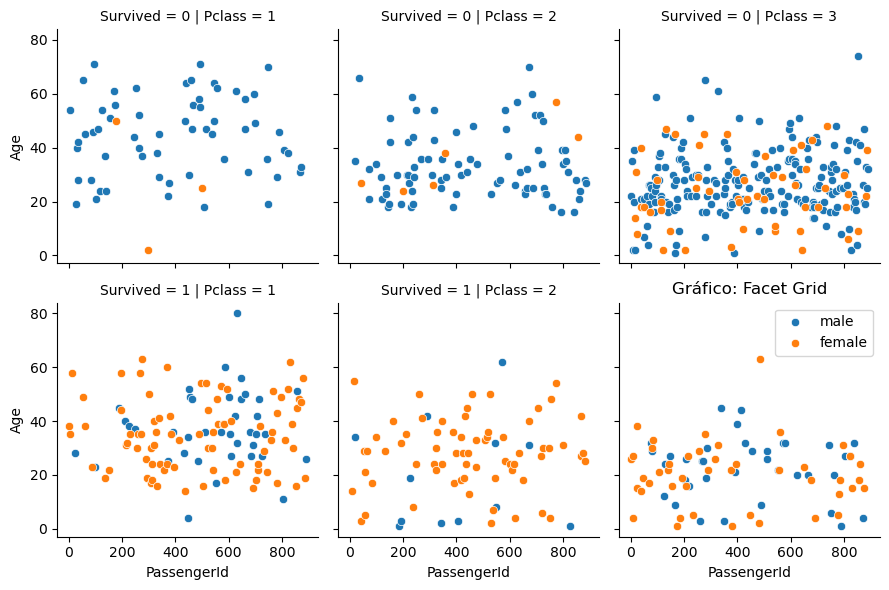

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
conn = mysql.connector.connect(host='127.0.0.1',
                                   port='3306',
                                   database= 'db_sprint8',
                                   user='root',
                                   password='***')

q = "SELECT * FROM titanic"
df = pd.read_sql_query(q, conn)
conn.close()

plt.figure(figsize=(10, 6))

custom_palette = {'blue': '#43a2ca', 'pink': '#ffb6c1', 'orange': '#feb24c', 'green': '#31a354'}

g = sns.FacetGrid(df, col="Pclass", row='Survived', hue='Sex')
g.map(sns.scatterplot, "PassengerId", "Age")

plt.title('Gráfico: Facet Grid')
plt.xlabel('PassengerId')
plt.ylabel('Age')
plt.legend()
plt.show()